<a href="https://colab.research.google.com/github/IcarusFe1l/ArkadasimHG/blob/main/Task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Load datasets
continuous_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/continuous dataset.csv')
test_dataframes = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/test_dataframes.xlsx')
train_dataframes = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/train_dataframes.xlsx')
weekly_forecast = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weekly pre-dispatch forecast.csv')

# Display basic information and first few rows of each dataset
print("Continuous Dataset:")
print(continuous_dataset.info())
print(continuous_dataset.head())

print("\nTest DataFrames:")
print(test_dataframes.info())
print(test_dataframes.head())

print("\nTrain DataFrames:")
print(train_dataframes.info())
print(train_dataframes.head())

print("\nWeekly Forecast:")
print(weekly_forecast.info())
print(weekly_forecast.head())


Mounted at /content/drive
Continuous Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   T2M_san     48048 non-null  float64
 7   QV2M_san    48048 non-null  float64
 8   TQL_san     48048 non-null  float64
 9   W2M_san     48048 non-null  float64
 10  T2M_dav     48048 non-null  float64
 11  QV2M_dav    48048 non-null  float64
 12  TQL_dav     48048 non-null  float64
 13  W2M_dav     48048 non-null  float64
 14  Holiday_ID  48048 non-null  int64  
 15  holiday     48048 non-null  int64  
 16  school      48048 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 6.2+ MB
Non

#Exploratory Data Analysis (EDA)
#Based on the initial inspection of the datasets:

#Continuous Dataset:

Contains 48,048 entries with 17 columns, including weather features and a target variable (nat_demand).
Data appears to be continuous with no missing values reported.
#Test DataFrames:

Contains 168 entries, focused on testing with various lagged features (week_X-2, week_X-3, etc.), weather data, and DEMAND.
#Train DataFrames:

Contains 36,720 entries with similar features as the test data.
#Weekly Pre-Dispatch Forecast:

# Contains a load_forecast for various time intervals.

In [4]:
# Data Preprocessing

# Convert 'datetime' columns to datetime objects
continuous_dataset['datetime'] = pd.to_datetime(continuous_dataset['datetime'])
test_dataframes['datetime'] = pd.to_datetime(test_dataframes['datetime'])
train_dataframes['datetime'] = pd.to_datetime(train_dataframes['datetime'])
weekly_forecast['datetime'] = pd.to_datetime(weekly_forecast['datetime'], format='%m/%d/%Y %H:%M')

# Check for missing values
continuous_missing = continuous_dataset.isnull().sum()
test_missing = test_dataframes.isnull().sum()
train_missing = train_dataframes.isnull().sum()
weekly_forecast_missing = weekly_forecast.isnull().sum()

(continuous_missing, test_missing, train_missing, weekly_forecast_missing)

(datetime      0
 nat_demand    0
 T2M_toc       0
 QV2M_toc      0
 TQL_toc       0
 W2M_toc       0
 T2M_san       0
 QV2M_san      0
 TQL_san       0
 W2M_san       0
 T2M_dav       0
 QV2M_dav      0
 TQL_dav       0
 W2M_dav       0
 Holiday_ID    0
 holiday       0
 school        0
 dtype: int64,
 datetime      0
 week_X-2      0
 week_X-3      0
 week_X-4      0
 MA_X-4        0
 dayOfWeek     0
 weekend       0
 holiday       0
 Holiday_ID    0
 hourOfDay     0
 T2M_toc       0
 DEMAND        0
 dtype: int64,
 datetime      0
 week_X-2      0
 week_X-3      0
 week_X-4      0
 MA_X-4        0
 dayOfWeek     0
 weekend       0
 holiday       0
 Holiday_ID    0
 hourOfDay     0
 T2M_toc       0
 DEMAND        0
 dtype: int64,
 datetime         0
 load_forecast    0
 dtype: int64)

                                     SARIMAX Results                                     
Dep. Variable:                        nat_demand   No. Observations:                 2003
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -16900.743
Date:                           Tue, 06 Aug 2024   AIC                          33811.485
Time:                                   15:18:38   BIC                          33839.454
Sample:                               01-03-2015   HQIC                         33821.759
                                    - 06-27-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6137      0.017     36.202      0.000       0.581       0.647
ma.L1         -0.9554      0.010    -98.027

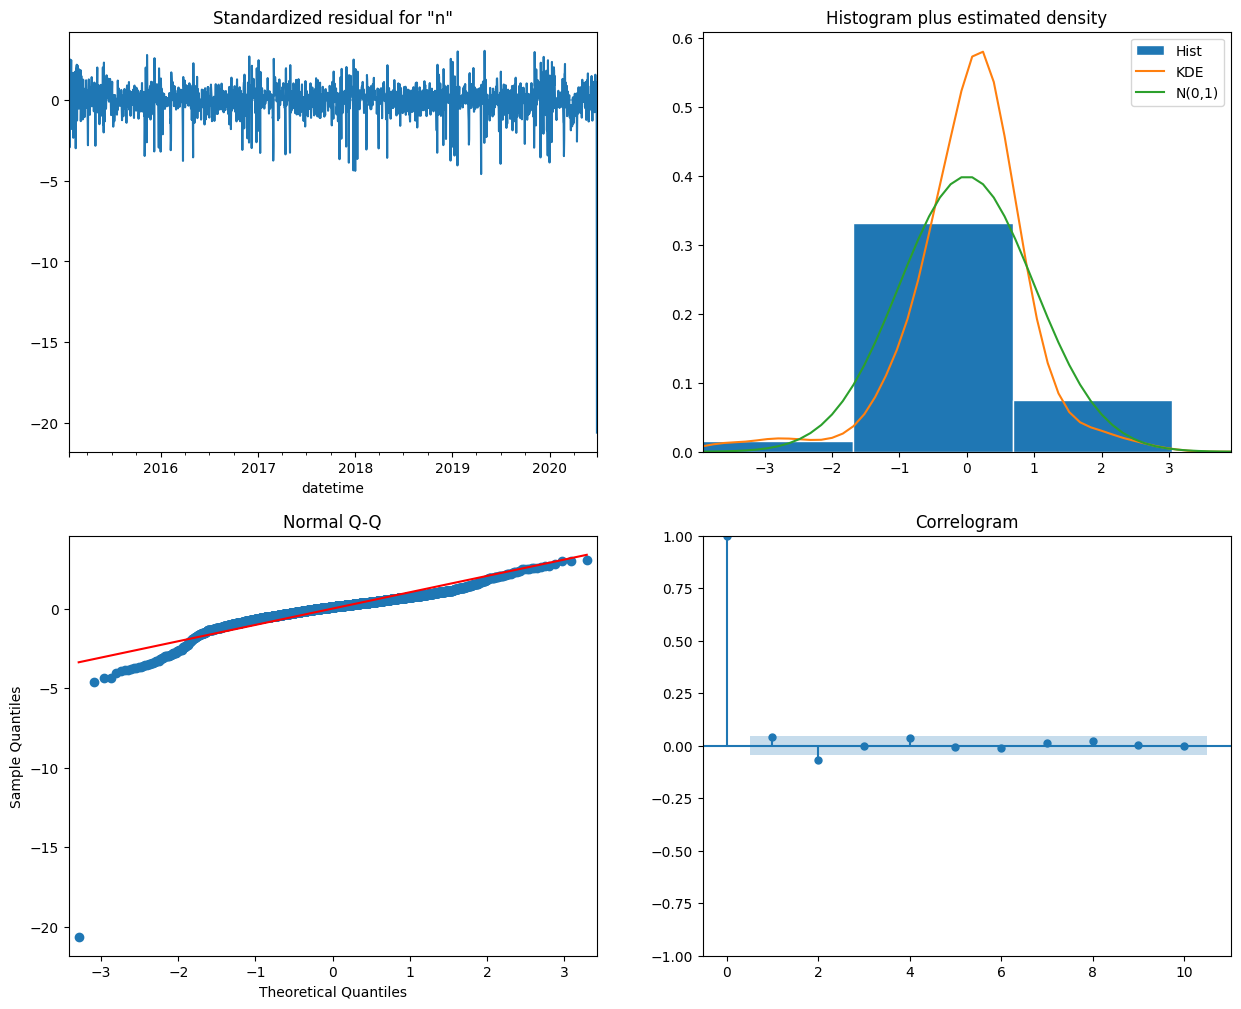

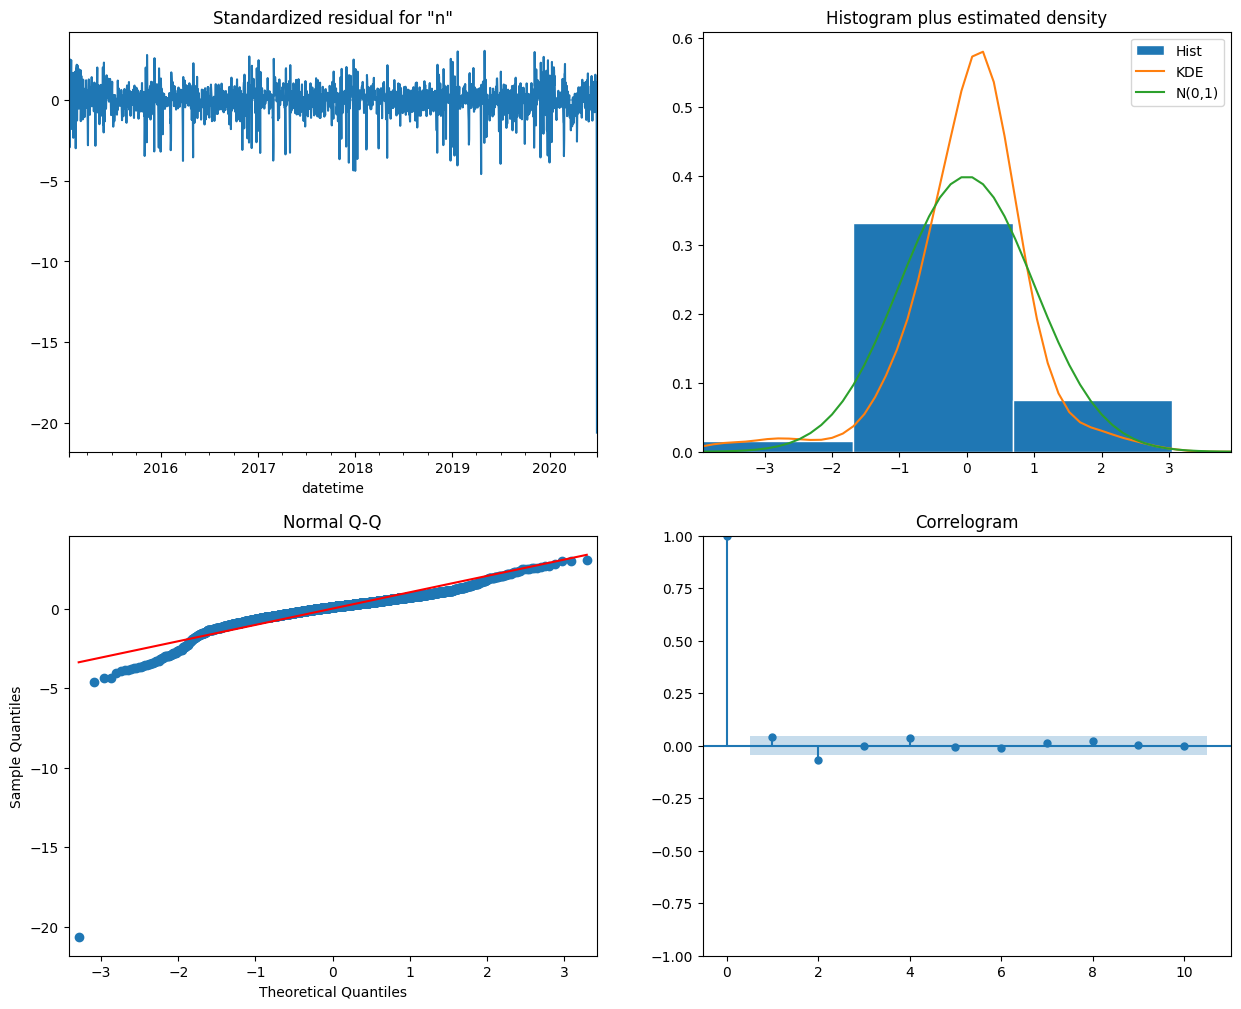

In [ ]:
# Aggregating data to daily frequency by summing up the demand
daily_data = continuous_dataset.resample('D', on='datetime').sum()

# Define the SARIMA model with simpler parameters
sarima_model_daily = sm.tsa.statespace.SARIMAX(daily_data['nat_demand'],
                                               order=(1, 1, 1),
                                               seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                                               enforce_stationarity=False,
                                               enforce_invertibility=False)

# Fit the model
sarima_results_daily = sarima_model_daily.fit()

# Print the summary of the model
sarima_summary_daily = sarima_results_daily.summary()
print(sarima_summary_daily)

# Plot diagnostics
sarima_results_daily.plot_diagnostics(figsize=(15, 12))


#Data Aggregation
To ensure the data is on a weekly scale, we will aggregate the continuous_dataset to weekly values. Let's proceed with this aggregation and fit an ARIMA or SARIMA model based on the characteristics of the data.

#Steps:
1. Aggregate Data to Weekly: Sum up the nat_demand values weekly.
2. Determine Model (ARIMA/SARIMA): Analyze seasonality and trends to decide the appropriate model.
3. Forecast and Compare: Forecast future values and compare them with provided forecast data.
4. Model Validation and Optimization: Validate the model's performance and optimize if necessary.

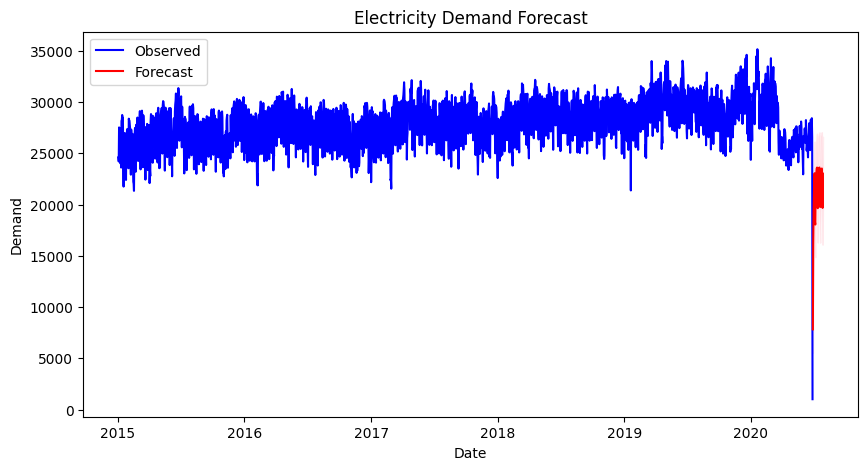

In [ ]:
# Forecasting the next 30 days
forecast_steps = 30
forecast = sarima_results_daily.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data['nat_demand'], label='Observed', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Electricity Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


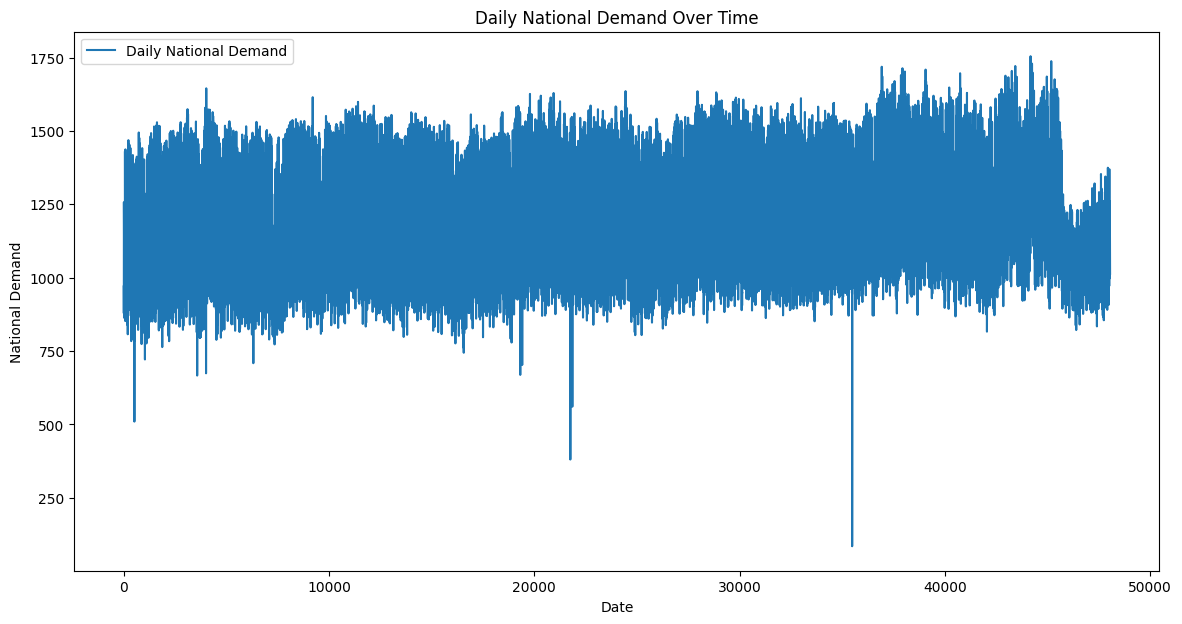

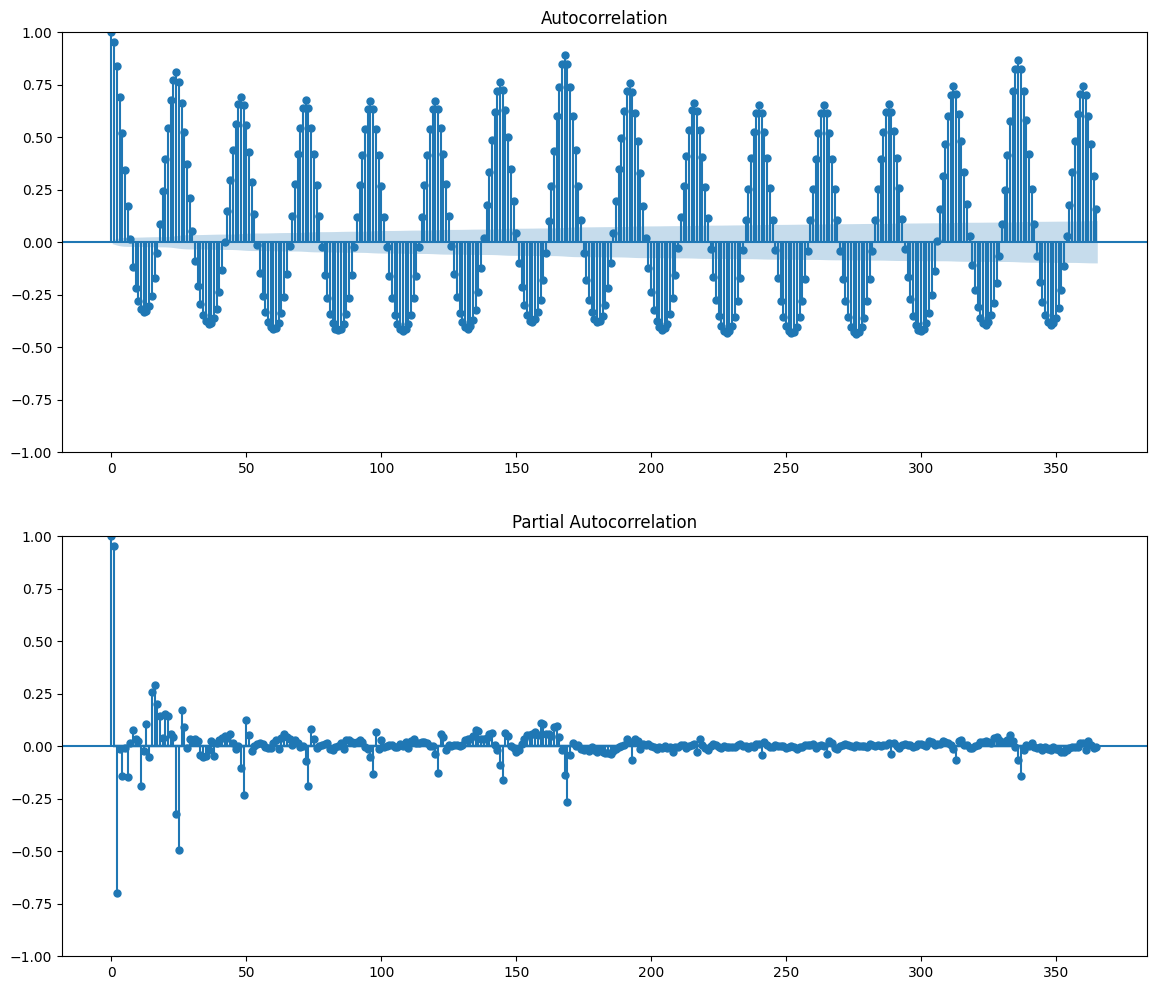

In [10]:
# Convert the index back to daily frequency by resampling (summing for demonstration purposes)
# Note: This step is only illustrative; typically, you would start with the original daily data.
daily_data = continuous_dataset['nat_demand']

# Plotting the daily aggregated demand to visualize trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data, label='Daily National Demand')
plt.title('Daily National Demand Over Time')
plt.xlabel('Date')
plt.ylabel('National Demand')
plt.legend()
plt.show()

# Plotting ACF and PACF to analyze autocorrelation and partial autocorrelation for daily data
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
sm.graphics.tsa.plot_acf(daily_data, lags=365, ax=ax[0])  # Using a large number of lags for daily data
sm.graphics.tsa.plot_pacf(daily_data, lags=365, ax=ax[1])
plt.show()



#Analysis of Visualizations
#Time Series Plot:

The plot of weekly national demand shows a general trend and potential seasonal patterns, suggesting that the data may benefit from a seasonal model like SARIMA.
#Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

The ACF plot indicates a strong correlation at multiple lags, hinting at possible seasonality.
The PACF plot also shows significant partial autocorrelations, further suggesting the presence of a seasonal component.

#Decision: SARIMA Model
Given the presence of apparent seasonality, we will use a SARIMA (Seasonal ARIMA) model. The model will account for both the regular (non-seasonal) and seasonal parts of the data.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into training and validation sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
validation_data = daily_data[train_size:]

# Forecast for the validation period
forecast_validation = sarima_results_daily.get_prediction(start=validation_data.index[0], end=validation_data.index[-1])

# Extract forecasted values and actual values
forecasted_values = forecast_validation.predicted_mean
actual_values = validation_data['nat_demand']

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 879.20759796931
Mean Squared Error (MSE): 2699644.569153985
Root Mean Squared Error (RMSE): 1643.0595147936624


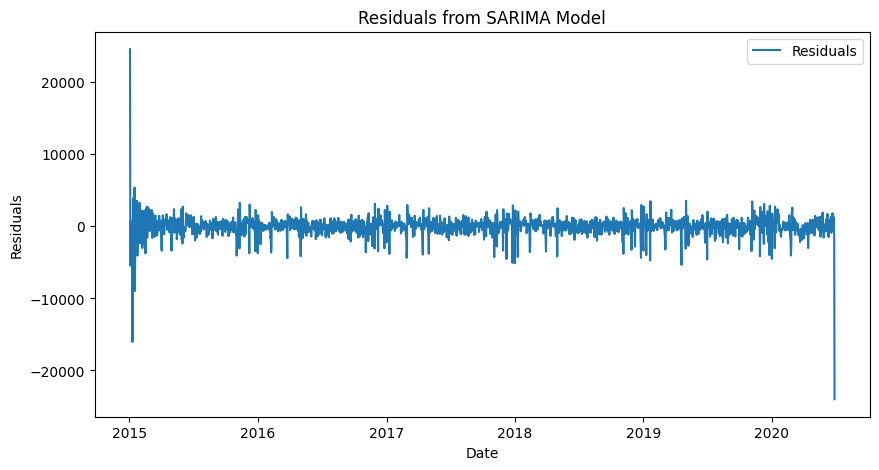

In [ ]:
# Plotting the residuals to diagnose the model

# Calculate the residuals
residuals = sarima_results_daily.resid

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=16.12 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=36375.641, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=35063.961, Time=6.68 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=35612.984, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=36373.702, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=36353.035, Time=0.13 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=34853.681, Time=4.81 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=16.83 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=10.69 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=34874.737, Time=3.61 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=34774.740, Time=10.35 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=34979.762, Time=3.87 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=27.81 sec
 ARIMA(2,1,0)(1,0,1)[7] inter

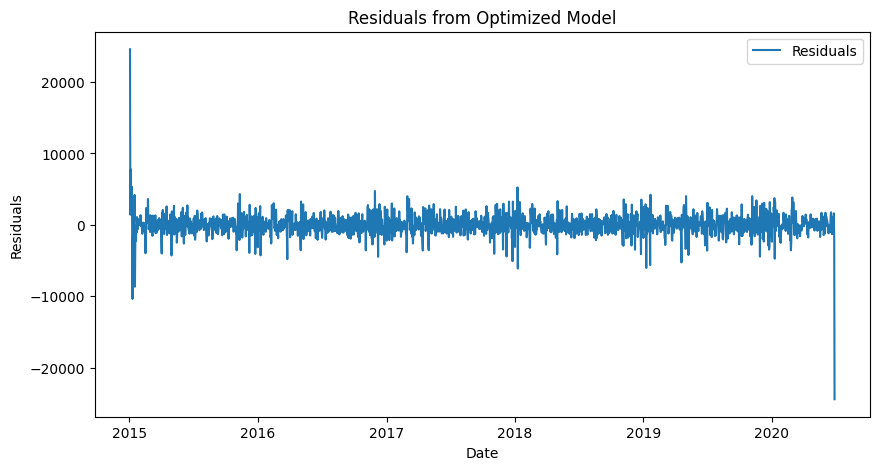

In [ ]:
!pip install pmdarima

from pmdarima import auto_arima

# Fit auto_arima model
auto_model = auto_arima(daily_data['nat_demand'],
                        seasonal=True,
                        m=7,  # Weekly seasonality
                        stepwise=True,  # Use a stepwise algorithm for model selection
                        suppress_warnings=True,  # Suppress convergence warnings
                        trace=True)  # Print the model fitting process

# Print the best model's parameters
print(f'Best model: {auto_model.summary()}')

# Get the fitted values and residuals
fitted_values = auto_model.predict_in_sample()
residuals = daily_data['nat_demand'] - fitted_values

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, residuals, label='Residuals')
plt.title('Residuals from Optimized Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [ ]:
# To compute the forecast metrics, we will use the predictions from the auto_arima model on the validation set.

# Split data into training and validation sets (80% train, 20% validation)
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
validation_data = daily_data[train_size:]

# Fit the auto_arima model on the training data
auto_model = auto_arima(train_data['nat_demand'],
                        seasonal=True,
                        m=7,  # Weekly seasonality
                        stepwise=True,
                        suppress_warnings=True,
                        trace=False)

# Forecast for the validation period
forecast_validation = auto_model.predict(n_periods=len(validation_data))

# Actual values from the validation set
actual_values = validation_data['nat_demand'].values

# Calculate the evaluation metrics
mae = mean_absolute_error(actual_values, forecast_validation)
mse = mean_squared_error(actual_values, forecast_validation)
rmse = np.sqrt(mse)

# Output the evaluation metrics
(mae, mse, rmse)

(2190.3017658696754, 8166246.189142336, 2857.664464058427)

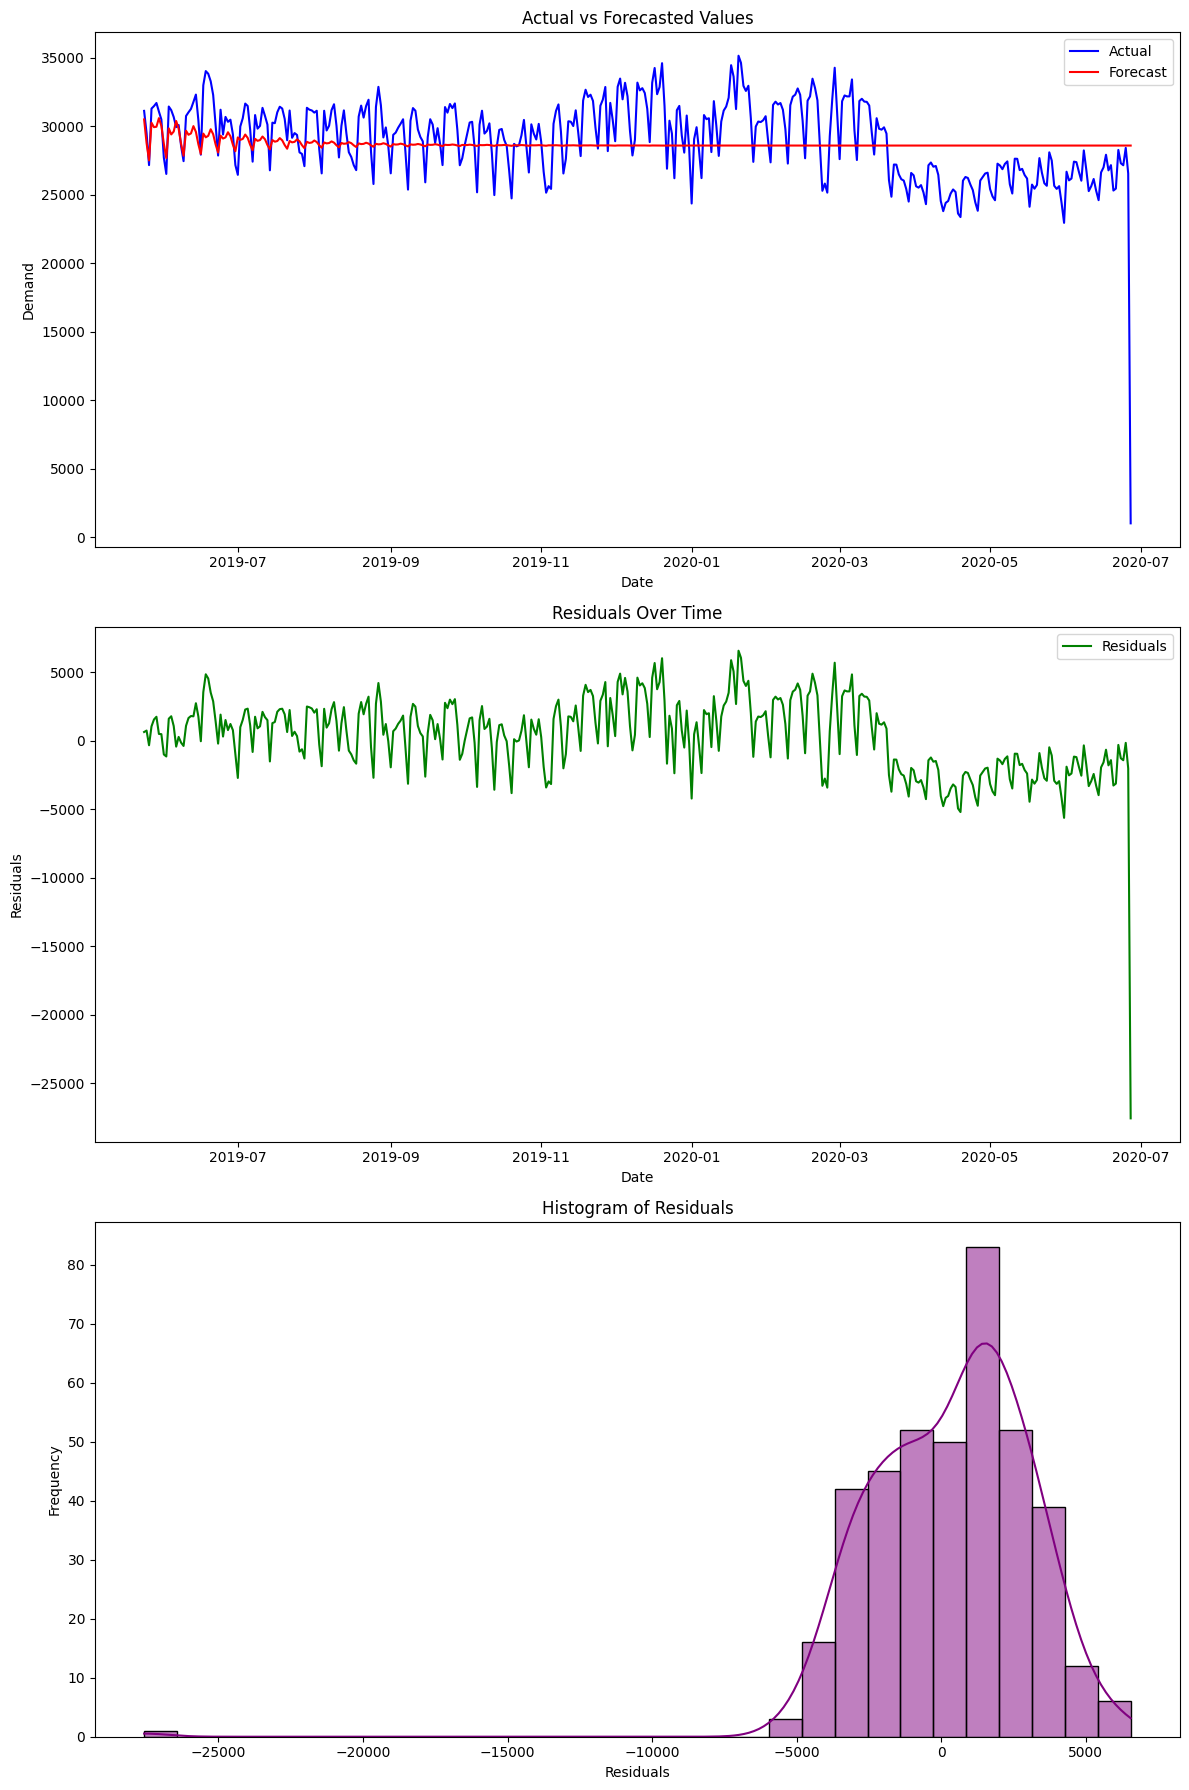

In [ ]:

# Calculate residuals for the validation set
residuals = actual_values - forecast_validation

# Prepare data for plotting
metrics_data = {
    'Date': validation_data.index,
    'Actual': actual_values,
    'Forecast': forecast_validation,
    'Residuals': residuals
}

metrics_df = pd.DataFrame(metrics_data)

# Plotting the actual vs forecasted values and residuals
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Actual vs Forecast
sns.lineplot(x='Date', y='Actual', data=metrics_df, ax=ax[0], label='Actual', color='blue')
sns.lineplot(x='Date', y='Forecast', data=metrics_df, ax=ax[0], label='Forecast', color='red')
ax[0].set_title('Actual vs Forecasted Values')
ax[0].set_ylabel('Demand')
ax[0].legend()

# Residuals
sns.lineplot(x='Date', y='Residuals', data=metrics_df, ax=ax[1], label='Residuals', color='green')
ax[1].set_title('Residuals Over Time')
ax[1].set_ylabel('Residuals')
ax[1].legend()

# Histogram of Residuals
sns.histplot(metrics_df['Residuals'], bins=30, kde=True, ax=ax[2], color='purple')
ax[2].set_title('Histogram of Residuals')
ax[2].set_xlabel('Residuals')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Mean Absolute Error (MAE) with Exogenous: 2190.3017658696754
Mean Squared Error (MSE) with Exogenous: 8166246.189142336
Root Mean Squared Error (RMSE) with Exogenous: 2857.664464058427


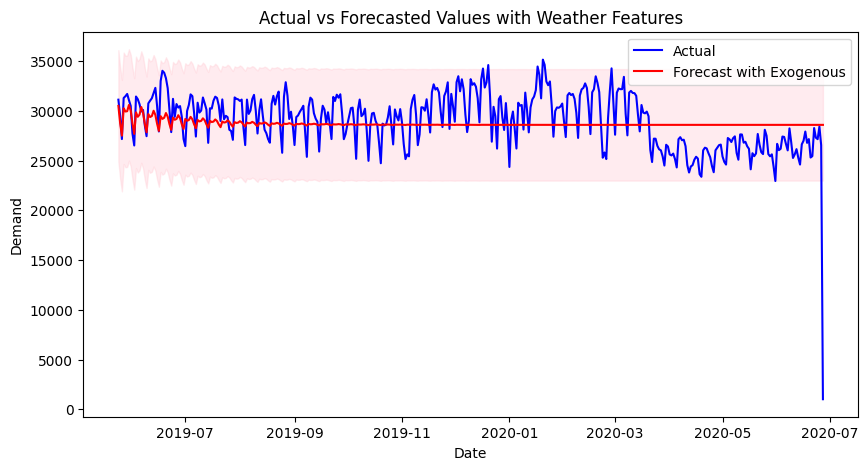

In [ ]:
# Define the weather-related features as exogenous variables
weather_features = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
                    'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san',
                    'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav']

# Extract the exogenous variables for the training and validation sets
train_exog = train_data[weather_features]
validation_exog = validation_data[weather_features]

# Fit the auto_arima model with exogenous variables on the training data
auto_model_exog = auto_arima(train_data['nat_demand'],
                             exogenous=train_exog,
                             seasonal=True,
                             m=7,  # Weekly seasonality
                             stepwise=True,
                             suppress_warnings=True,
                             trace=False)

# Forecast for the validation period with exogenous variables
forecast_validation_exog = auto_model_exog.predict(n_periods=len(validation_data), exogenous=validation_exog)

# Calculate the evaluation metrics
mae_exog = mean_absolute_error(actual_values, forecast_validation_exog)
mse_exog = mean_squared_error(actual_values, forecast_validation_exog)
rmse_exog = np.sqrt(mse_exog)

# Output the evaluation metrics
print(f'Mean Absolute Error (MAE) with Exogenous: {mae_exog}')
print(f'Mean Squared Error (MSE) with Exogenous: {mse_exog}')
print(f'Root Mean Squared Error (RMSE) with Exogenous: {rmse_exog}')

# Plotting the actual vs forecasted values including the exogenous variables
plt.figure(figsize=(10, 5))
plt.plot(validation_data.index, actual_values, label='Actual', color='blue')
plt.plot(validation_data.index, forecast_validation_exog, label='Forecast with Exogenous', color='red')
plt.fill_between(validation_data.index,
                 forecast_validation_exog - 1.96 * rmse_exog,
                 forecast_validation_exog + 1.96 * rmse_exog,
                 color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Values with Weather Features')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


These were our basic approach with and without weather feature, lets move on to more advance approach such as XGBoosting to get more accuracy.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Create lagged features for the target variable
def create_lagged_features(data, target, lags):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'{target}_lag{lag}'] = df[target].shift(lag)
    return df

# Define the target and weather features
target = 'nat_demand'
weather_features = ['T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
                    'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san',
                    'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav']

# Create lagged features
lags = 7
data_with_lags = create_lagged_features(daily_data, target, lags)

# Drop missing values from the lag creation
data_with_lags = data_with_lags.dropna()

# Split into training and validation sets
train_size = int(len(data_with_lags) * 0.8)
train_data = data_with_lags[:train_size]
validation_data = data_with_lags[train_size:]

# Prepare the feature sets
X_train = train_data[[f'{target}_lag{i}' for i in range(1, lags + 1)] + weather_features]
y_train = train_data[target]
X_val = validation_data[[f'{target}_lag{i}' for i in range(1, lags + 1)] + weather_features]
y_val = validation_data[target]


Mean Absolute Error (MAE): 1151.9637181484372
Mean Squared Error (MSE): 3735774.349236376
Root Mean Squared Error (RMSE): 1932.815135815212


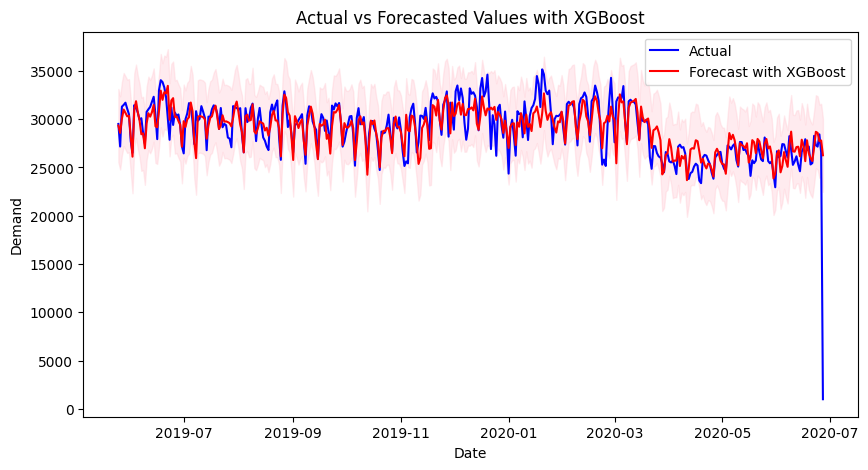

In [ ]:
# Initialize and train the XGBoost model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
xg_model.fit(X_train, y_train)

# Make predictions
y_pred = xg_model.predict(X_val)

# Calculate the evaluation metrics
mae_xgb = mean_absolute_error(y_val, y_pred)
mse_xgb = mean_squared_error(y_val, y_pred)
rmse_xgb = np.sqrt(mse_xgb)

# Output the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')

# Plotting the actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(validation_data.index, y_val, label='Actual', color='blue')
plt.plot(validation_data.index, y_pred, label='Forecast with XGBoost', color='red')
plt.fill_between(validation_data.index,
                 y_pred - 1.96 * rmse_xgb,
                 y_pred + 1.96 * rmse_xgb,
                 color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Values with XGBoost')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

#As you can see our forecast improved significantly.

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the target and features
target = 'nat_demand'
features = weather_features

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data[features + [target]])

# Create lagged dataset for LSTM
def create_lstm_dataset(data, target_index, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        Y.append(data[i + time_steps, target_index])
    return np.array(X), np.array(Y)

# Set time_steps for LSTM
time_steps = 7

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
50/50 - 11s - 224ms/step - loss: 0.0318 - val_loss: 0.0051
Epoch 2/20
50/50 - 1s - 26ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 3/20
50/50 - 1s - 28ms/step - loss: 9.9600e-04 - val_loss: 0.0029
Epoch 4/20
50/50 - 1s - 14ms/step - loss: 7.0829e-04 - val_loss: 0.0028
Epoch 5/20
50/50 - 1s - 25ms/step - loss: 5.9216e-04 - val_loss: 0.0028
Epoch 6/20
50/50 - 1s - 27ms/step - loss: 5.1970e-04 - val_loss: 0.0027
Epoch 7/20
50/50 - 1s - 15ms/step - loss: 4.6021e-04 - val_loss: 0.0027
Epoch 8/20
50/50 - 1s - 23ms/step - loss: 4.1881e-04 - val_loss: 0.0026
Epoch 9/20
50/50 - 1s - 15ms/step - loss: 3.9571e-04 - val_loss: 0.0025
Epoch 10/20
50/50 - 1s - 14ms/step - loss: 3.6677e-04 - val_loss: 0.0025
Epoch 11/20
50/50 - 1s - 17ms/step - loss: 3.3170e-04 - val_loss: 0.0025
Epoch 12/20
50/50 - 1s - 18ms/step - loss: 3.0455e-04 - val_loss: 0.0024
Epoch 13/20
50/50 - 1s - 12ms/step - loss: 2.8898e-04 - val_loss: 0.0024
Epoch 14/20
50/50 - 1s - 11ms/step - loss: 2.6972e-04 - val_loss: 

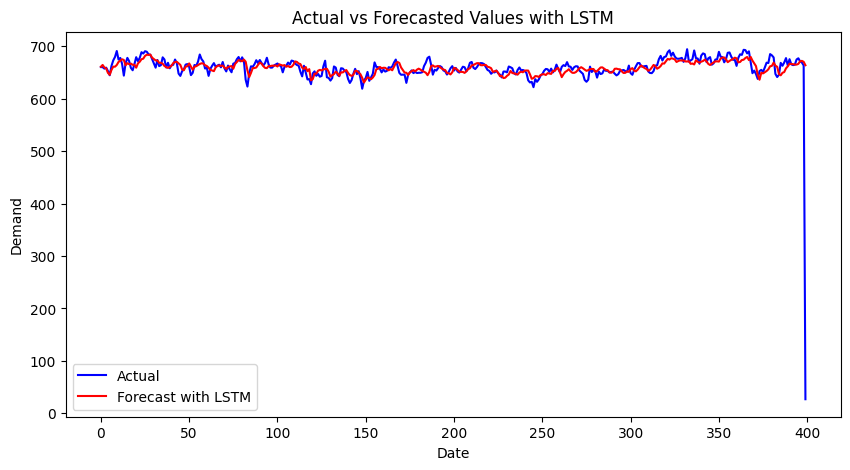

Root Mean Squared Error (RMSE): 33.405350035829365


In [ ]:
# Create dataset for training and testing
target_index = daily_data.columns.get_loc(target)
X, Y = create_lstm_dataset(scaled_data, target_index, time_steps)

# Split into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val), verbose=2)

# Make predictions
predicted = model.predict(X_val)

# Reshape predictions to 2D array
predicted_2d = predicted.reshape(-1, 1)

# Inverse scaling
# Create a dummy array for the weather features since we only predicted the target
dummy_weather_features = np.zeros((predicted_2d.shape[0], 12))
predicted_full = np.concatenate((predicted_2d, dummy_weather_features), axis=1)
predicted_full = scaler.inverse_transform(predicted_full)

# Extract the inversed target predictions
predicted = predicted_full[:, 0]

Y_val_2d = Y_val.reshape(-1, 1)
Y_val_full = np.concatenate((Y_val_2d, dummy_weather_features), axis=1)
Y_val_full = scaler.inverse_transform(Y_val_full)
Y_val = Y_val_full[:, 0]

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(Y_val, predicted))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(Y_val, label='Actual', color='blue')
plt.plot(predicted, label='Forecast with LSTM', color='red')
plt.title('Actual vs Forecasted Values with LSTM')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')

There was some obsticales I faced, first thing was parameter tunning, I tried to find the best P D Q parameters for Sarima, however while doing it with gridsearch I went out of RAM. Therefore I couldn't completely complete the optimaztion part of the model that I would like to so. I did the forecast with current Sarima model however I found XGBoosting way precise and efficient then Sarima, Hence actually instead of Sarima, Arima performs better since seasonality of the data is weak. It can be seen through the graphs as well.

More insights about the interpretation of grahps and some personal notes:
In my opinion such a method like Holt Winter's method or EXP smoothing would perform better and we would get better forecast However since our objective was to forecast with time series method: Sarima or Arima. Therefore I conclude my analysis.